In [3]:
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import os
from analsis.analsis_utils.plot_utils import plot_two_metrics, plot_two_metrics_vs_colored_metric, \
    plot_binned_metric_vs_mean_metric, plot_two_metrics_by_ephoc, plot_two_metrics_with_mean, \
    plot_two_metrics_with_mean_multi_ep, plot_two_metrics_by_ephoc, plot_two_ann_metrics_train_test, \
    plot_two_ann_metrics_begining_end, plot_mean_r2_bars, plot_hist_of_performances_by_ephoc
import joblib
from itertools import combinations

COLORS = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897', '#f6bd60', '#e76f51', '#2a9d8f', "#c77dff", "#f7d6e0"]
COLORS_20 = ["#adb5bd", "#7ec4cf", '#4F6272', "#3de0fe", "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897',
             '#9a8c98',
             '#f6bd60', '#8a5a44', "#ede7b1", "#ff9505", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596',
             "#8c2f39", "#d0ee11",
             ]
COLORS_16 = ["#adb5bd", '#4F6272', "#c77dff", '#B7C3F3', '#2d6a4f', '#2a9d8f', '#8EB897', '#9a8c98',
             '#f6bd60', "#ede7b1", '#e29578', '#f5cac3', "#f7d6e0", '#DD7596', '#DD7596', "#8c2f39"]
rads = ["#ea5545", "#e1a692", "#DD7596", '#9A3B3B', "#b30000"]
maroon = ["#900c3f", "#c70039", '#900c3f']


In [13]:
sys.path.append('/Users/noamazmon/PycharmProjects/network_modularity/main')


In [4]:
results_path = "/Volumes/noamaz/modularity/xor/"
local_base_path = '/Users/noamazmon/PycharmProjects/network_modularity'
task_name = 'XOR'
task = "xor"
dims = [6, 6, 5, 3, 2]
num_layers = str(len(dims) - 1)
_, dim1, dim2, dim3, _ = dims
time_str = dt.now().strftime("%Y-%m-%d-%H-%M-%S")
res_folder = f"{task}_{num_layers}_layers_{dim1}_{dim2}_{dim3}"
plot_path = f"{local_base_path}/plots/for_poster/{res_folder}"

In [5]:
gen_good_archs_folder = f"{results_path}/{res_folder}/requiered_features_genetic_models/4_features/good_archs_1s/"
with open(f"{gen_good_archs_folder}/2023-09-19-10-57-46_feature_values_4_features_good_archs.pkl", 'rb') as fp:
    gen_good_archs_data = joblib.load(fp)

In [18]:
gen_feature_vals_by_feature_name = gen_good_archs_data['feature_vals_by_feature_name']

In [14]:
ergm_good_archs_folder = f"{results_path}/{res_folder}/ergm_results/4_features"
with open(f"{ergm_good_archs_folder}/2023-09-18-17-00-39_J11_P1_n.pkl", 'rb') as fp:
    ergm_good_archs_data = joblib.load(fp)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [16]:
ergm_feature_vals_by_feature_name = {
    k: []
    for k in ergm_good_archs_data['features_names']
}
for i, g_stats in enumerate(ergm_good_archs_data['graphs_stats']):
    for j, f_val_name in enumerate( ergm_good_archs_data['features_names']):
        ergm_feature_vals_by_feature_name[f_val_name].append(g_stats[j])

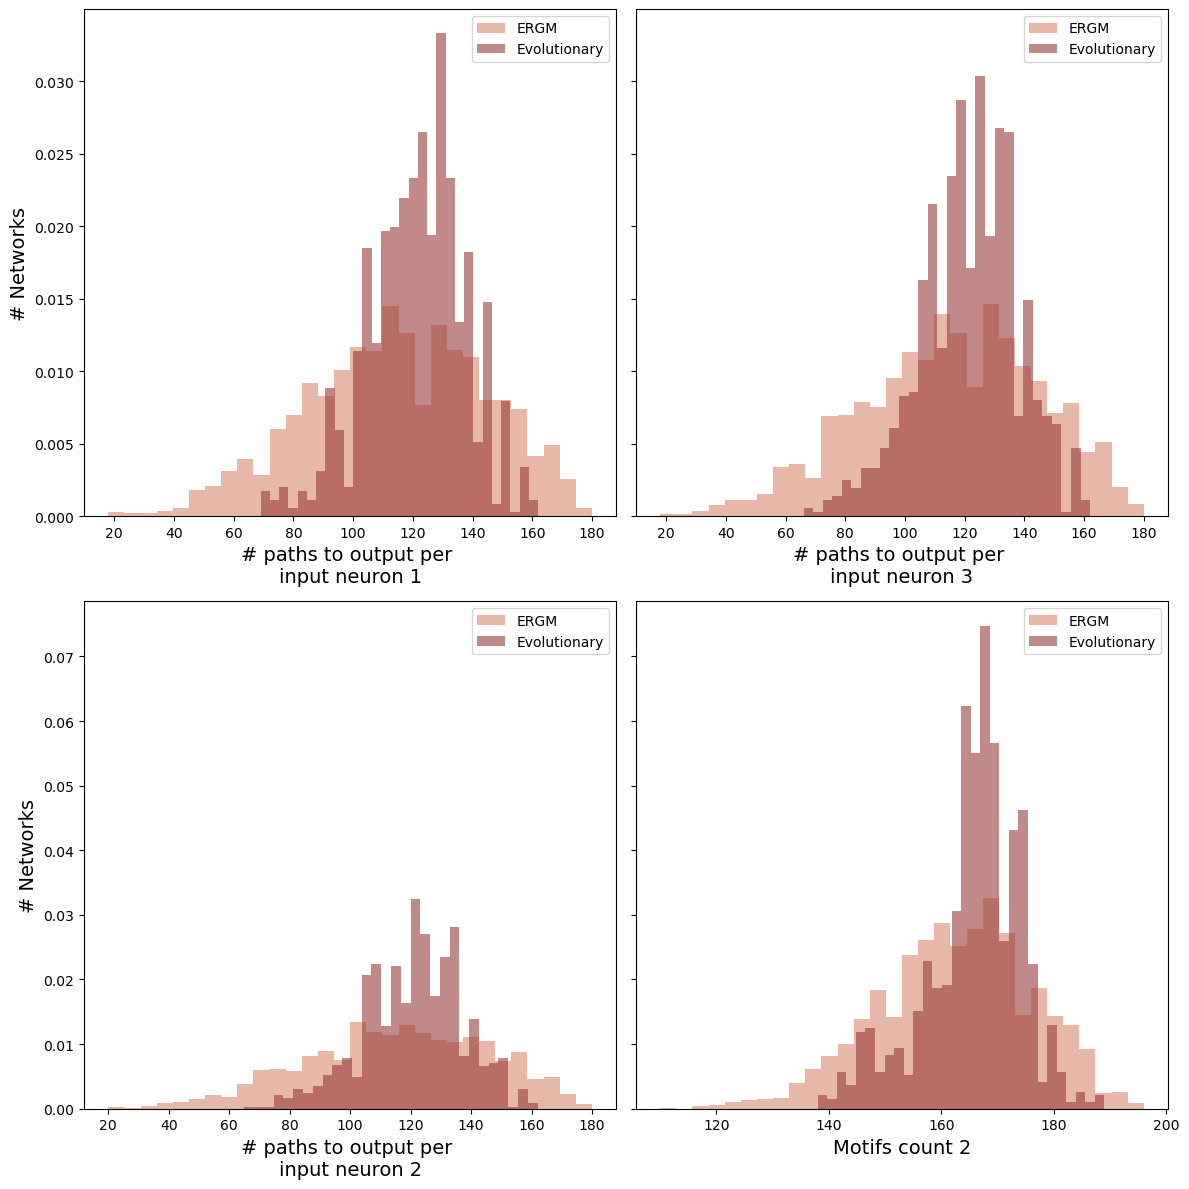

In [39]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12), sharey='row')
axs_list = [axs[0,0], axs[1,0], axs[0,1], axs[1,1]]
for j, f_val_name in enumerate( ergm_good_archs_data['features_names']):
    axs_list[j].hist(ergm_feature_vals_by_feature_name[f_val_name], color=rads[1], bins = 30, density=True, alpha=0.8, label='ERGM')
    axs_list[j].hist(gen_feature_vals_by_feature_name[f_val_name], color=rads[3], bins = 30, density=True,  alpha=0.6, label='Evolutionary')
    if 'per_input' in f_val_name:
        neuron = f_val_name.split('(')[1].split(' ')[1].split(')')[0]
        f_val_name = f_val_name.split('(')[0].replace('num', '#') + neuron
    if len(f_val_name) > 30:
        name = f"{f_val_name.replace('_', ' ')[:22]}\n{f_val_name.replace('_', ' ')[22:]}"
    else:
        name = f"{f_val_name.replace('_', ' ')}"
    axs_list[j].set_xlabel(f"{name.capitalize()}",  fontsize=14)
    #axs_list[j].set_title(f_val_name)
    axs_list[j].legend()
axs[1, 0].set_ylabel(f"# Networks", fontsize=14)
axs[0, 0].set_ylabel(f"# Networks", fontsize=14)
plt.tight_layout()
plt.show()

In [72]:
first_analsis_res_folder = f"{results_path}/{res_folder}/first_analysis_results"
first_analsis_file_name = f"2023-09-05-09-24-47_all_results_from_teach_archs_results_with_motifs_10000_ep.csv"
first_analsis_orig = pd.read_csv(f"{first_analsis_res_folder}/{first_analsis_file_name}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)

In [40]:
lgbm_folder_name = 'exp_2023-09-16-13-35-58_nice_features'
lgb_res_path = f"{results_path}/{res_folder}/lightgbm_feature_selection/{lgbm_folder_name}"
lgb_res_nn_path = f"{lgb_res_path}/teach_archs_regression_feature_selection_results"
all_features_values = pd.read_csv(f"{lgb_res_path}/4_feature_values.csv").drop("Unnamed: 0", axis=1)

In [41]:
selected_feature_names = list(all_features_values.columns)[:-1]

In [50]:
first_analsis_res_folder_ergm = f"{results_path}/{res_folder}/ergm_results/4_features/2023-09-18-17-00-39_J11_P1_n/first_analysis_results"
first_analsis_file_name_ergm = f"2023-09-20-12-13-02_all_results_from_teach_archs_results_with_motifs_no_duplicates_all_features.csv"


In [73]:
first_analsis_ergm = pd.read_csv(f"{first_analsis_res_folder_ergm}/{first_analsis_file_name_ergm}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis_ergm.columns = first_analsis_ergm.columns.str.replace(", ", "_ ")

In [91]:
first_analsis_res_folder_gem = f"{results_path}/{res_folder}/requiered_features_genetic_models/4_features/good_archs_1s/first_analysis_results/"
first_analsis_file_name_gen = "2023-09-20-12-32-52_all_results_from_teach_archs_results_with_motifs_no_duplicates_all_features.csv"

In [92]:
first_analsis_gen = pd.read_csv(f"{first_analsis_res_folder_gem}/{first_analsis_file_name_gen}").rename(
    columns={'connectivity_ratio': 'density',
             }).sort_values('mean_performance', ascending=False)
first_analsis_gen.columns = first_analsis_gen.columns.str.replace(", ", "_ ")

In [97]:
first_analsis_ergm.shape

(2348, 106)

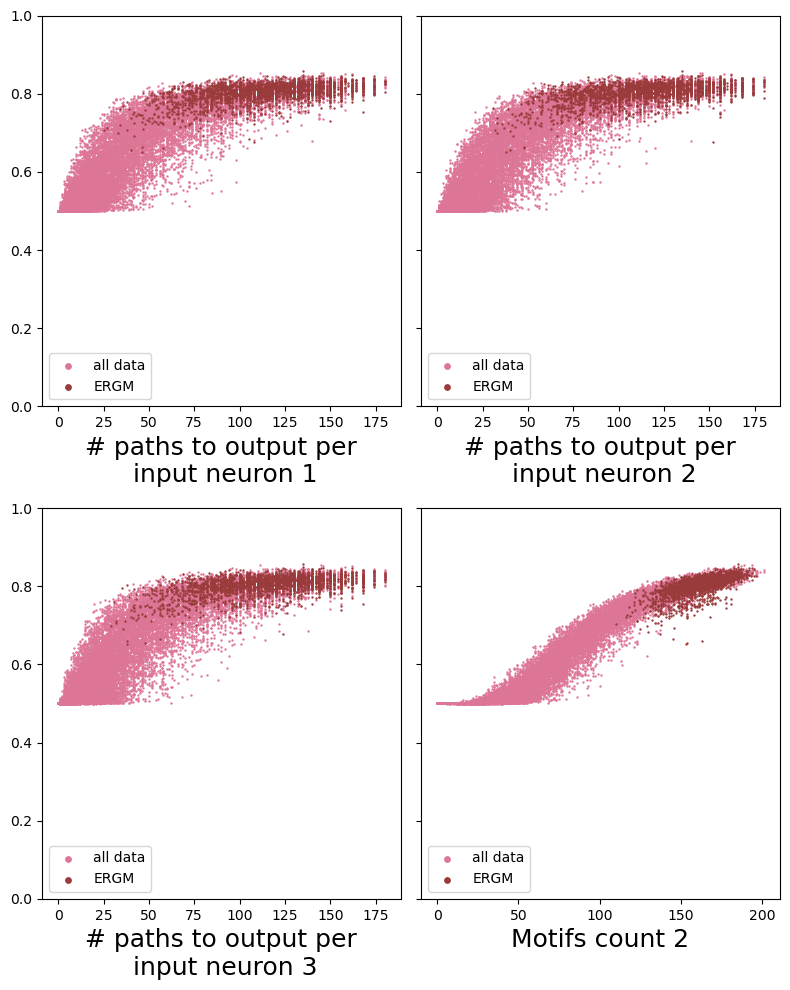

In [101]:
num_columns = int(np.ceil(len(selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    axs[i, j].scatter(all_features_values[f_name], all_features_values['label'], color=COLORS[2], s=0.5, label='all data')
    axs[i, j].scatter(first_analsis_ergm[f_name], first_analsis_ergm['mean_performance'], color=rads[3], s=0.5, label='ERGM')
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 30:
        name = f"{f_name.replace('_', ' ')[:21]}\n{f_name.replace('_', ' ')[21:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    #axs[i, j].set_title(f"{name}", wrap=True)
    axs[i, j].set_xlabel(f"{name.capitalize()}",  fontsize=18)
    axs[i, j].set_ylim(0,1)
    lgnd = axs[i, j].legend(loc="lower left", numpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [15]
    lgnd.legendHandles[1]._sizes = [15]
#axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
#axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist_with_ergm.png")


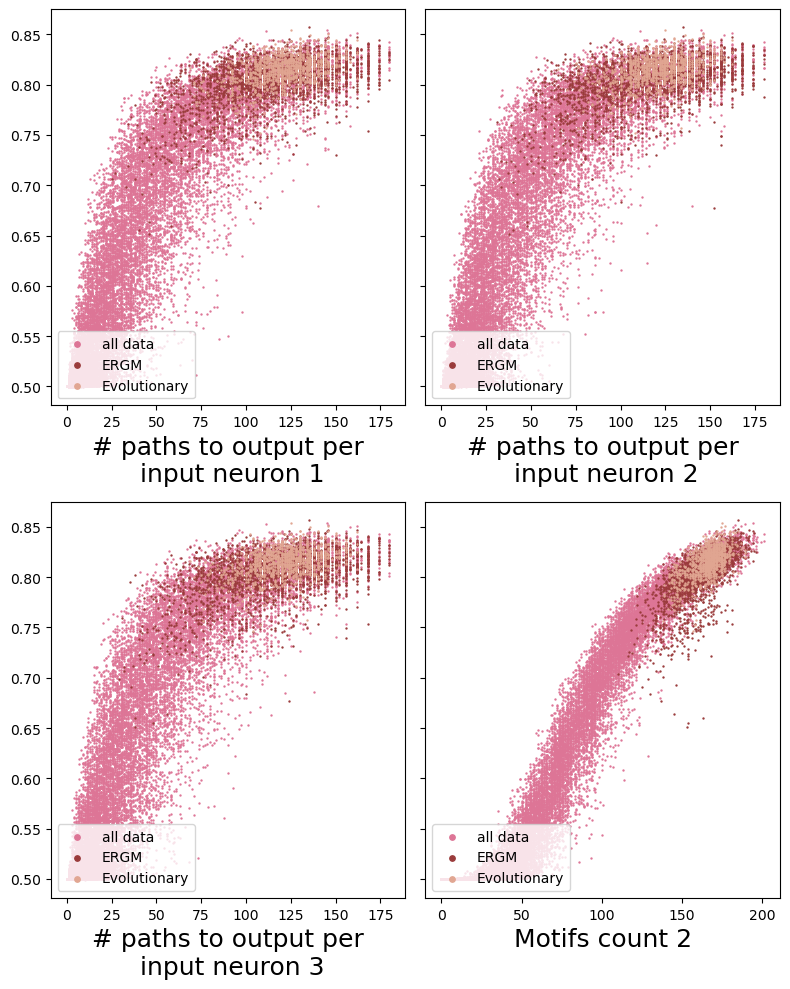

In [100]:
num_columns = int(np.ceil(len(selected_feature_names) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, (f_name, (i, j)) in enumerate(zip(selected_feature_names, idxs)):
    axs[i, j].scatter(all_features_values[f_name], all_features_values['label'], color=COLORS[2], s=0.5, label='all data')
    axs[i, j].scatter(first_analsis_ergm[f_name], first_analsis_ergm['mean_performance'], color=rads[3], s=0.5, label='ERGM')
    axs[i, j].scatter(first_analsis_gen[f_name], first_analsis_gen['mean_performance'], color=rads[1], s=0.5, label='Evolutionary')
    if 'per_input' in f_name:
        neuron = f_name.split('(')[1].split(' ')[1].split(')')[0]
        f_name = f_name.split('(')[0].replace('num', '#') + neuron
    if len(f_name) > 30:
        name = f"{f_name.replace('_', ' ')[:21]}\n{f_name.replace('_', ' ')[21:]}"
    else:
        name = f"{f_name.replace('_', ' ')}"
    #axs[i, j].set_title(f"{name}", wrap=True)
    axs[i, j].set_xlabel(f"{name.capitalize()}",  fontsize=18)
    #axs[i, j].set_ylim(0,1)
    lgnd = axs[i, j].legend(loc="lower left", numpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [15]
    lgnd.legendHandles[1]._sizes = [15]
    lgnd.legendHandles[2]._sizes = [15]
#axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
#axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_six_fetaures_dist_with_ergm_and_gen.png")


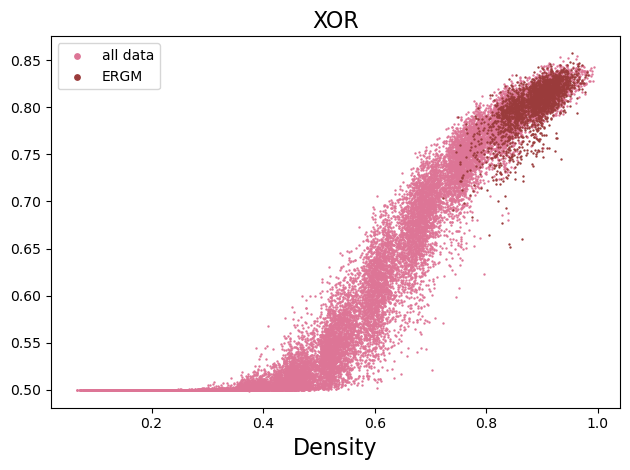

In [77]:

x_metric_name = 'density'
y_metric_name = 'mean_performance'


x_data = first_analsis_orig[x_metric_name] + np.random.normal(-0.008, 0.008, first_analsis_orig[x_metric_name].shape[0])
x_data_ergm = first_analsis_ergm[x_metric_name] + np.random.normal(-0.008, 0.008, first_analsis_ergm[x_metric_name].shape[0])
plt.scatter(x_data, first_analsis_orig[y_metric_name], c=COLORS[2], s=0.5, label='all data')
plt.scatter(x_data_ergm, first_analsis_ergm[y_metric_name], color=rads[3], s=0.5, label='ERGM')
lgnd = plt.legend(loc="upper left", numpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [15]
lgnd.legendHandles[1]._sizes = [15]
#plt.ylabel("Network's mean performance", fontsize=12)
plt.xlabel('Density', fontsize=16)
plt.title(
    f"{task.upper()}",
    wrap=True, fontsize=16)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_{y_metric_name}_vs_{x_metric_name}_with_ergm.png", dpi=300)
plt.show()

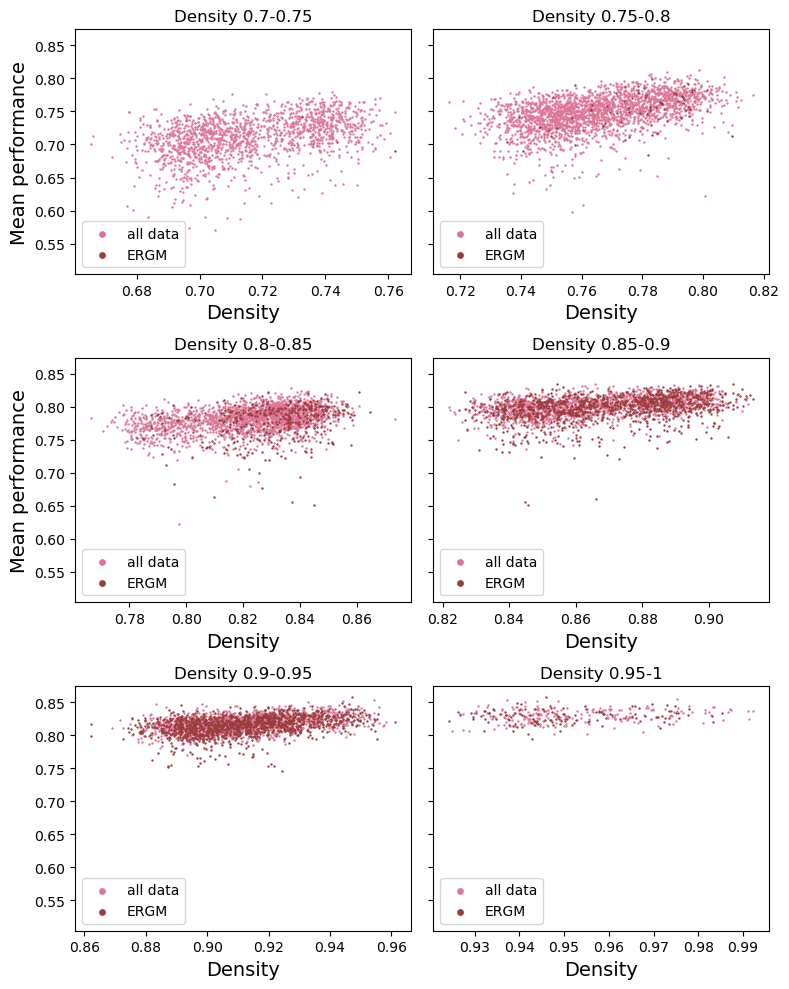

In [87]:
density_bins = [(0.7, 0.75), (0.75, 0.8), (0.8, 0.85), (0.85, 0.9), (0.9, 0.95), (0.95, 1)]
num_columns = int(np.ceil(len(density_bins) / 2))
fig, axs = plt.subplots(num_columns, 2, figsize=(8, 10), sharey='all')
min_x = 1.0
max_x = 0
idxs = []
r, c, = axs.shape
for i in range(r):
    for j in range(c):
        idxs.append((i, j))
for k, ((min_den, max_den), (i, j)) in enumerate(zip(density_bins, idxs)):
    all_features_for_density = first_analsis_orig[first_analsis_orig[x_metric_name].between(min_den, max_den)]
    ergm_features_for_density = first_analsis_ergm[first_analsis_ergm[x_metric_name].between(min_den, max_den)]
    x_data = all_features_for_density[x_metric_name] + np.random.normal(-0.008, 0.008, all_features_for_density[x_metric_name].shape[0])
    x_data_ergm = ergm_features_for_density[x_metric_name] + np.random.normal(-0.008, 0.008, ergm_features_for_density[x_metric_name].shape[0])
    axs[i, j].scatter(x_data, all_features_for_density[y_metric_name], c=COLORS[2], s=0.5, label='all data')
    axs[i, j].scatter(x_data_ergm, ergm_features_for_density[y_metric_name], color=rads[3], s=0.5, label='ERGM')
    axs[i, j].set_title(f"Density {min_den}-{max_den}", wrap=True)
    axs[i, j].set_xlabel(f"Density",  fontsize=14)
    lgnd = axs[i, j].legend(loc="lower left", numpoints=1, fontsize=10)
    lgnd.legendHandles[0]._sizes = [15]
    lgnd.legendHandles[1]._sizes = [15]
axs[1, 0].set_ylabel(f"Mean performance", fontsize=14)
axs[0, 0].set_ylabel(f"Mean performance", fontsize=14)
plt.tight_layout()
plt.savefig(
    f"{plot_path}/{time_str}_{task}_sensity_with_ergm_per_dens.png")
